# Challenge (1/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

En este proyecto vamos a asumir el papel de Dani, una persona apasionada de los datos que está aplicando a una vacante como analista de datos en el Instituto Nacional de Estadística y Geografía (INEGI), un organismo autónomo del Gobierno de México dedicado a coordinar el **Sistema Nacional de Información Estadística y Geográfica** del país.

En la descripción de la vacante le han indicado que es esencial que pueda construir un tablero (dashboard) para representar el conjunto de datos de sus elección. Obtendrá puntos extra si utiliza datos del instituto y si es capaz de representar dichos datos en un mapa.


## 1. Vamos a elegir nuestro conjunto de datos

Consulta el [sitio de descarga masiva de datos del INEGI](https://www.inegi.org.mx/app/descarga/)
1. Elije un estado, o bien, deja la selección por defecto de "Estados Unidos Mexicanos".
2. Verifica que estés en la pestaña de DENUE.
3. Explora la sección de actividad económica haciendo clic en el signo de `+` que aparece a la izquierda del título. Se desplegará una tabla con diversos títulos.
4. Explora la lista de títulos y elige el que más te guste, recuerda descargar los archivos CSV y SHP mediante los botones de la derecha.

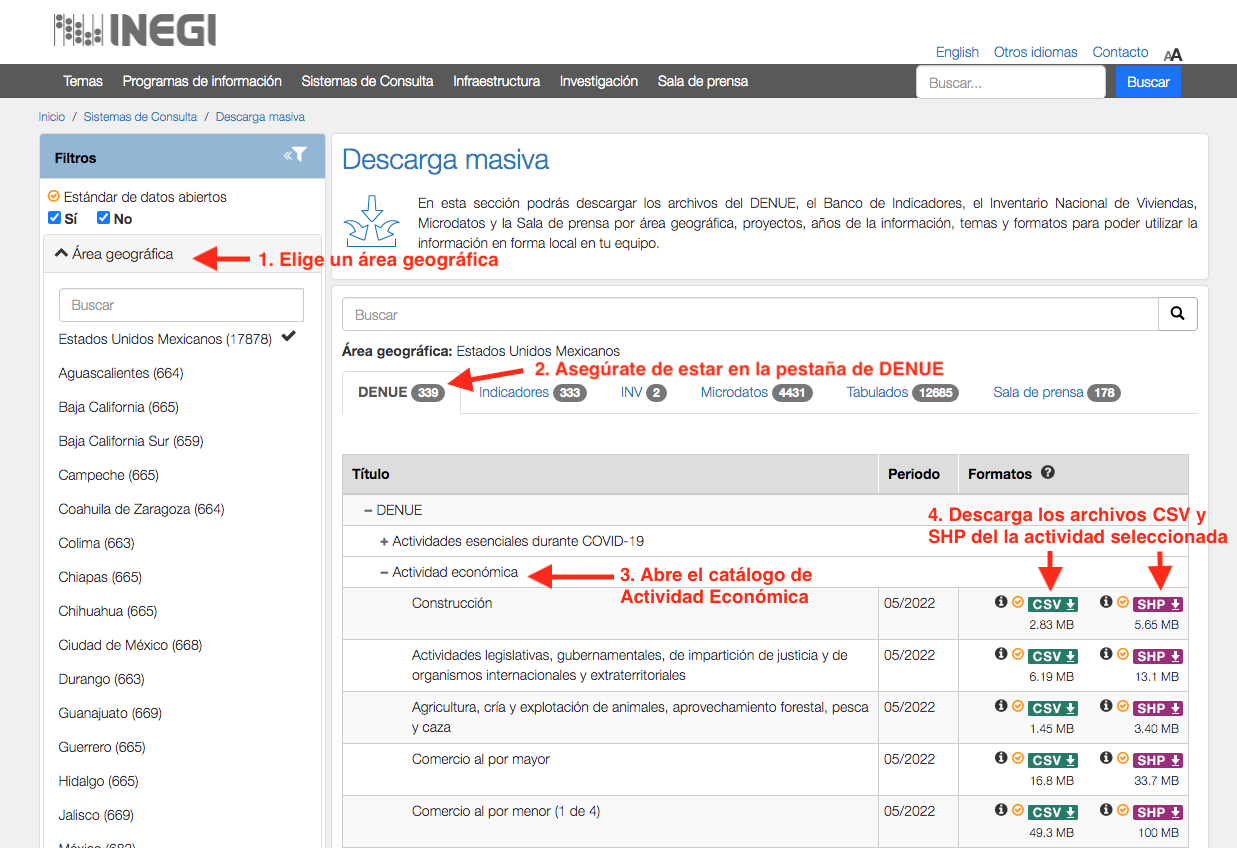



5. Finalmente, sube tus archivos a una carpeta en Google Drive.

## 2. Hora de ver qué contienen esas carpetas misteriosas

### Ubica tus archivos y obtén sus rutas

1. Ubica el icono de carpeta en la parte izquierda de la pantalla. Haz clic en el icono y a continuación haz clic en el icono de carpeta con el logo de Google Drive:
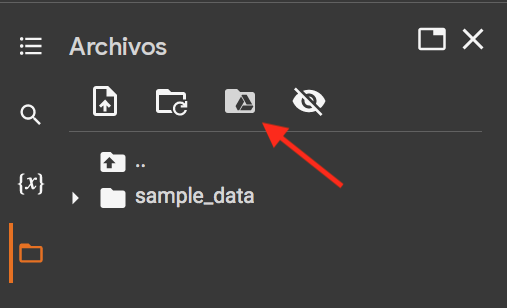

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Después explora en tu unidad y encuentra tus archivos. Recuerda que puedes hacer clic en los 3 puntitos y seleccionar "Copiar la ruta de acceso":


### Descomprime los conjuntos de datos

Nuestros datos se descargaron en carpetas comprimidas (Zip), busca una forma de descomprimir esas carpetas con Python y obtén los archivos que contienen. Consejo: consulta el [siguiente ejemplo](https://stackoverflow.com/questions/3451111/unzipping-files-in-python)

In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Proyecto_Dev.F/denue_00_51_csv.zip', 'r') as zip_ref:
    zip_ref.extractall('denue_51')
  

Al descomprimir, notarás que hay 3 carpetas:
- metadados
- conjunto_de_datos
- diccionario_de_datos

Realiza lo siguiente:
1. Con Pandas lee las primeras filas del CSV de la carpeta conjunto_de_datos. Si hay más de un archivo, obtén las primeras filas de cada uno
2. Obtén las primeras filas del CSV de la carpeta diccionario_de_datos

Nota: El diccionario de datos contiene el significado de las columnas del conjunto de datos. Tómate un momento para leerlo, esto facilitará la exploración más adelante.

In [3]:
import pandas as pd

In [8]:
df=pd.read_csv('/content/denue_51/conjunto_de_datos/denue_inegi_51_.csv', encoding='latin-1')
df.head()


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,9289805,01001517311000401000000000U4,ACNET,ACNET,517311,Operadores de servicios de telecomunicaciones ...,0 a 5 personas,AVENIDA,UNIVERSIDAD,CALLE,...,Aguascalientes,2259,19,NaN,NaN,NaN,Fijo,21.917209,-102.313807,2020-11
1,7621927,01001518210000122000000000U9,AGENCIA DE MARKETIN 33.1,NaN,518210,"Procesamiento electrónico de información, hosp...",6 a 10 personas,AVENIDA,LICENCIADO ADOLFO LOPEZ MATEOS ORIENTE,CALLE,...,Aguascalientes,0816,42,NaN,GABRIEL@RDZ.MX,WWW.TREINTAYTRES.UNO,Fijo,21.878487,-102.280774,2019-11
2,8500411,01001519110000021000000000U4,AGENCIA NOTICIOSA TURBINA INFORMATIVA,TURBINA INFORMATIVA SA DE CV,519110,Agencias noticiosas,0 a 5 personas,BOULEVARD,LICENCIADO ADOLFO RUIZ CORTINES,CALLE,...,Aguascalientes,1674,4,NaN,NaN,NaN,Fijo,21.873049,-102.331844,2019-11
3,9277997,01001517311000323000014251S0,AGUASCALIENTES,TELECOMUNICACIONES DE MEXICO SA DE CV SOFOM ENR,517311,Operadores de servicios de telecomunicaciones ...,11 a 30 personas,CALLE,Pedro Parga,CALLE,...,Aguascalientes,0638,11,NaN,miguel.albores@telecomm.gob.mx,https://www.telecomm.gob.mx/,Fijo,21.884923,-102.292281,2020-11
4,17294,01001517112000111000014866S1,ALESTRA,AXTEL S DE RL DE CV,517311,Operadores de servicios de telecomunicaciones ...,0 a 5 personas,AVENIDA,UNIVERSIDAD,CALLE,...,Aguascalientes,2259,19,NaN,INFO@ALESTRA.MX,WWW.ALESTRA.MX,Fijo,21.917209,-102.313807,2011-03


In [7]:
diccionario=pd.read_csv('/content/denue_51/diccionario_de_datos/denue_diccionario_de_datos.csv',  encoding='latin-1')
diccionario


,DICCIONARIO DE DATOS DENUE (15/06/2016),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Nombre del Atributo en csv,Nombre del Atributo en DBF,Tipo de dato,Longitud,Descripción
1,id,id,numérico,10,"Número de identificación del DENUE, es una cl..."
2,nom_estab,nom_estab,alfanumérico,150,Es el nombre comercial o nombre exterior con e...
3,raz_social,raz_social,alfanumérico,150,Es la forma con que está legalmente constituid...
4,codigo_act,codigo_act,alfanumérico,6,La clasificación de las actividades desarrolla...
5,nombre_act,nombre_act,alfanumérico,250,Nombre del código de actividad conforme al SCI...
6,per_ocu,per_ocu,alfanumérico,20,Comprende al personal contratado directamente ...
7,tipo_vial,tipo_vial,alfanumérico,25,Es la superficie del terreno destinada para el...
8,nom_vial,nom_vial,alfanumérico,100,Es el sustantivo propio con el cual se identif...
9,tipo_v_e_1,tipo_v_e_1,alfanumérico,40,Es la superficie del terreno destinada para el...


## 3. Todo buen proyecto de data science comienza con una pregunta (o muchas 😉)

Ahora que conocemos un poco el conjunto de datos y que hemos dado significado a las columnas mediante el diccionario de datos, podemos realizar algunas validaciones.

Completa las siguientes tareas:
1. Utiliza algún método para obtener el tipo de dato almacenado en cada columna.
2. Valida que al menos tengas una columna numérica (tipo int o float), una columna con fechas (tipo date) y una columna con valores categóricos (tipo object). Si no cuentas con alguna de ellas, por ejemplo, la de fechas; puedes elegir otro conjunto de datos de la lista de INEGI.
3. Finalmente, plantea al menos 3 preguntas que quieras responder con los datos que descargaste. Procura que esas preguntas te lleven a realizar al menos:
  - Una gráfica para datos numéricos (barras, dispersión, área, etc).
  - Una gráfica para datos categóricos y numéricos (mapa de calor, gráfica de burbujas, treemap).
  - Una serie de tiempo. Puedes reutilizar la columna numérica que utilices para el primer punto pero recuerda contar con la columna de fechas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21225 non-null  int64  
 1   clee        21225 non-null  object 
 2   nom_estab   21225 non-null  object 
 3   raz_social  16705 non-null  object 
 4   codigo_act  21225 non-null  int64  
 5   nombre_act  21225 non-null  object 
 6   per_ocu     21225 non-null  object 
 7   tipo_vial   19878 non-null  object 
 8   nom_vial    21200 non-null  object 
 9   tipo_v_e_1  20393 non-null  object 
 10  nom_v_e_1   20953 non-null  object 
 11  tipo_v_e_2  20375 non-null  object 
 12  nom_v_e_2   20945 non-null  object 
 13  tipo_v_e_3  20368 non-null  object 
 14  nom_v_e_3   20923 non-null  object 
 15  numero_ext  16149 non-null  float64
 16  letra_ext   9556 non-null   object 
 17  edificio    3075 non-null   object 
 18  edificio_e  3297 non-null   object 
 19  numero_int  8606 non-null

**Escribe aquí tus preguntas...**

1. ¿Cual son los 10 servicios de comunicación con mayor presencia en el pais?
2. ¿Cuál es la distribución de los mismos en el pais?
3. ¿Cuales son las 10 razones sociales con más localizaciones en el pais?
4. ¿Cuantas empresas se han ido creando por estado a traves de los años?
5. ¿Hay una mayor presencia de microempresas que medianas en el pais?
6. ¿Cuales son las razones sociales con mayores presencia en el pais?
7. ¿Y cual es su distribución?
8. ¿Del servicio con mayor presencia en el país, como se distribuye?
9. ¿Como ha ido creciendo a traves de los años?


## 4. Realiza un pequeño bosquejo de tu dashboard.

Utilizando alguna herramienta que te permita dibujar, trata de plasmar cóm te imaginas que se verá tu dashboard.

Puedes tomar de inspiración los siguientes dashboards:

- https://dash.gallery/dash-opioid-epidemic/
- https://dash.gallery/dash-world-cell-towers/
- https://dash.gallery/dash-uber-rides-demo/
- [Galería completa de dashboards](https://dash.gallery/Portal/)

Realiza el bosquejo y súbelo como una imagen en el bloque de abajo:

**Tu bosquejo aquí...**
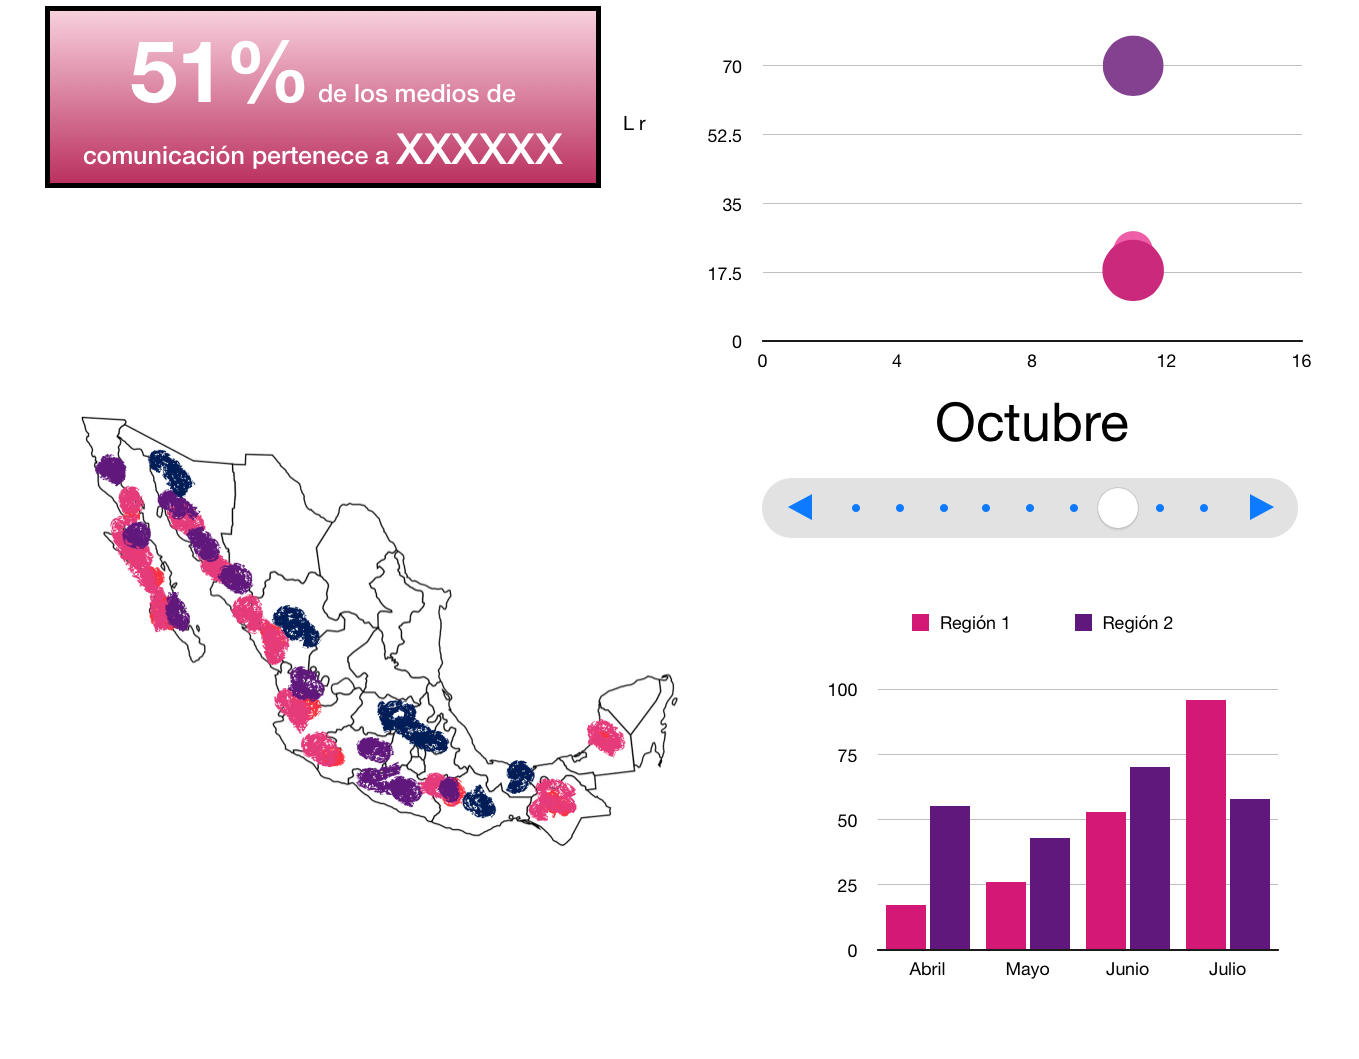